** Etivity 3**

**Student Name:** Ganapathy

**Student ID: **18202799


In [0]:
## NOTE: This is Python 3 code.
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
 
from sklearn import manifold
from sklearn import cluster 
from google.colab import files
import io
import seaborn as sns

In [3]:
uploaded = files.upload()

Saving loans_dataset_et3.csv to loans_dataset_et3.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['loans_dataset_et3.csv']))

In [5]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [6]:
df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
327,5417,4196.0,267,360,1
328,16666,0.0,275,360,1
329,10750,0.0,312,360,1
330,5955,5625.0,315,360,1
331,6133,3906.0,324,360,1


In [7]:
df.shape

(332, 5)

In [8]:
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
scaled_data = preprocessing.scale(df.T)
print(scaled_data)

[[ 1.23054826  1.99531418  1.99834205 ...  1.99873179  1.28301174
   1.62535377]
 [ 1.21601287 -0.56255416 -0.53365587 ... -0.53940778  1.16217326
   0.71776066]
 [-0.81552038 -0.49492698 -0.50898955 ... -0.46574271 -0.78222777
  -0.74205009]
 [-0.73856836 -0.37527887 -0.42265742 ... -0.45440962 -0.7657498
  -0.72737862]
 [-0.89247239 -0.56255416 -0.53303921 ... -0.53917168 -0.89720742
  -0.87368573]]


In [9]:
df.describe

<bound method NDFrame.describe of      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               2483        2466.000000          90               180   
1               4917           0.000000         130               360   
2               4106           0.000000          40               180   
3               3859        3300.000000         142               180   
4               6417           0.000000         157               180   
5              14583           0.000000         185               180   
6               9328           0.000000         188               180   
7               9323        7873.000000         380               300   
8               4885           0.000000          48               360   
9               3975        2531.000000          55               360   
10              2507           0.000000          56               360   
11              2213           0.000000          66               360   
12              2

In [10]:
df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

ApplicantIncome


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


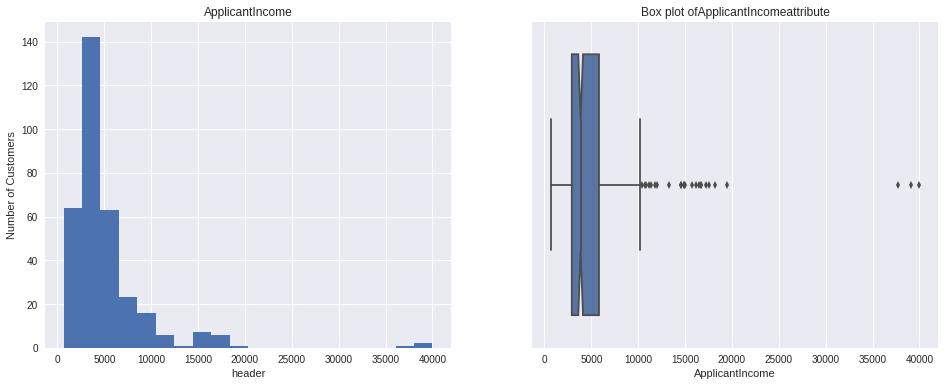

CoapplicantIncome


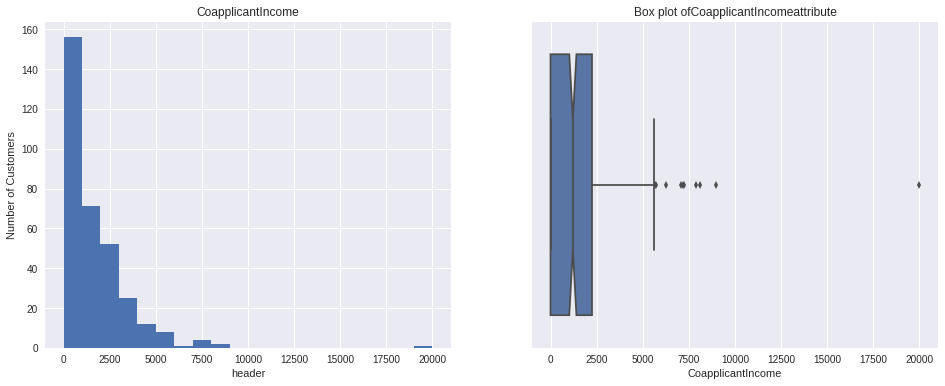

LoanAmount


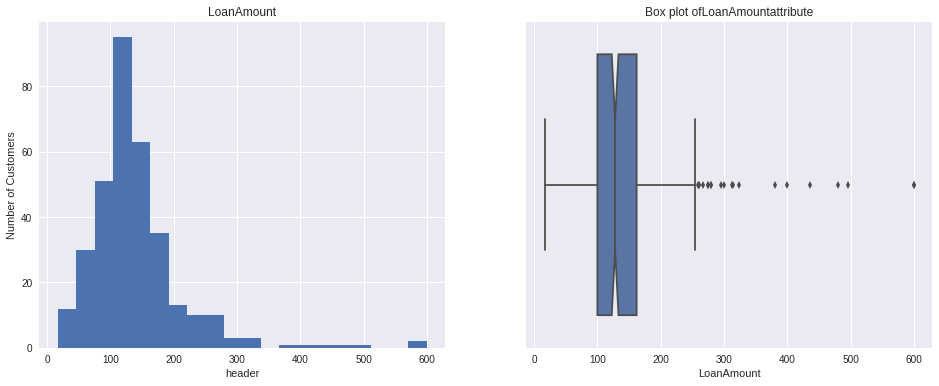

Loan_Amount_Term


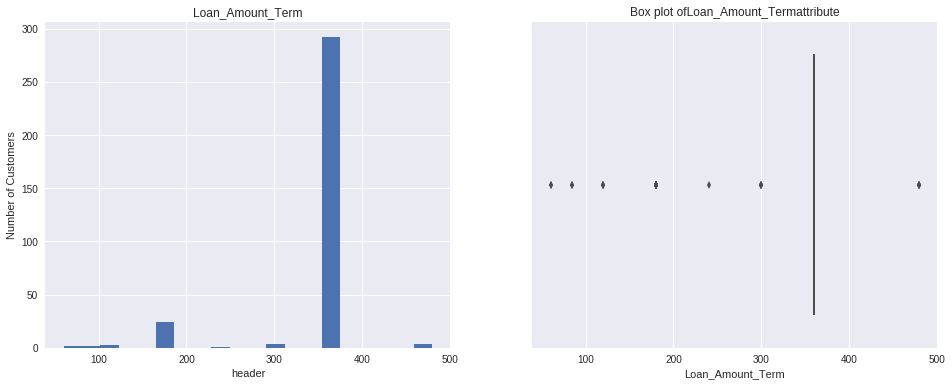

Credit_History


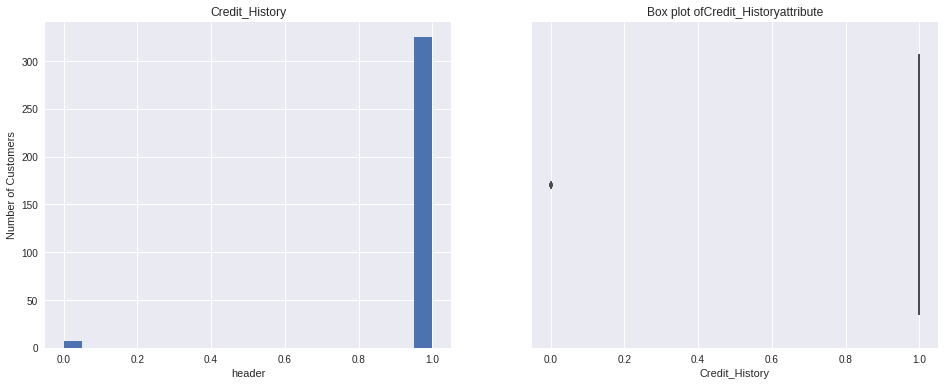

In [11]:
def plt_data(headers):
  for header in headers:
    print(header)
    # Create two subplots for balance attribute
    plt_fig = plt.figure(figsize=(16,6))

    # Plot for balance
    axis1 = plt_fig.add_subplot(1, 2, 1)
    axis1.set_title(header)
    axis1.set_xlabel('header')
    axis1.set_ylabel('Number of Customers')
    df[header].hist(bins=20)

    axis2 = plt_fig.add_subplot(1, 2, 2)
    sns.boxplot(x=header, data=df, notch=True)
    axis2.set_title("Box plot of" + header + "attribute")

    plt.show()

headers = df.dtypes.index
plt_data(headers)

### Task 1 (CS5062)
Cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering. Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters (max 250 words).

# Check if there are any outlier as it may affect the scaling algorithm

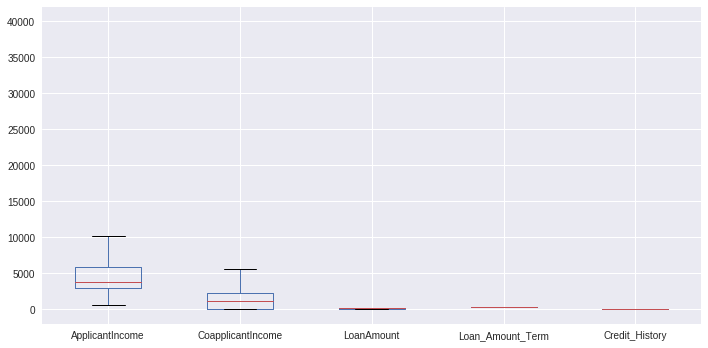

In [12]:
df.boxplot(figsize=(10,5))

plt.tight_layout()
plt.show()

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0          -1.078047           1.259680   -0.196561         -0.716482
1           0.743697          -0.995662   -0.126709         -0.125588
2           0.756379          -0.995662   -1.825856         -0.922800
3          -0.756951           1.085739    0.034594         -1.151595
4           0.758366          -0.995662   -0.321875         -1.353154
5           0.761746          -0.995662   -1.524189         -1.781510
6           0.760279          -0.995662   -0.761584         -1.591819
7          -0.730528           1.071093    0.359454         -1.447765
8           0.745362          -0.995662   -1.819017         -0.112003
9          -0.240762           0.721058   -1.631218         -0.038968
10          0.697121          -0.995662   -0.561420          1.761229
11          0.678143          -0.995662    0.186500          2.263295
12          0.712808          -0.995662   -0.338249          1.243890
13          0.712474

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


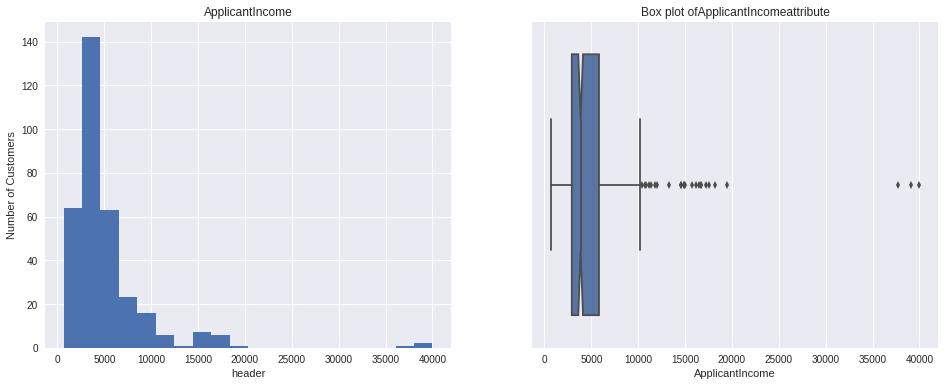

CoapplicantIncome


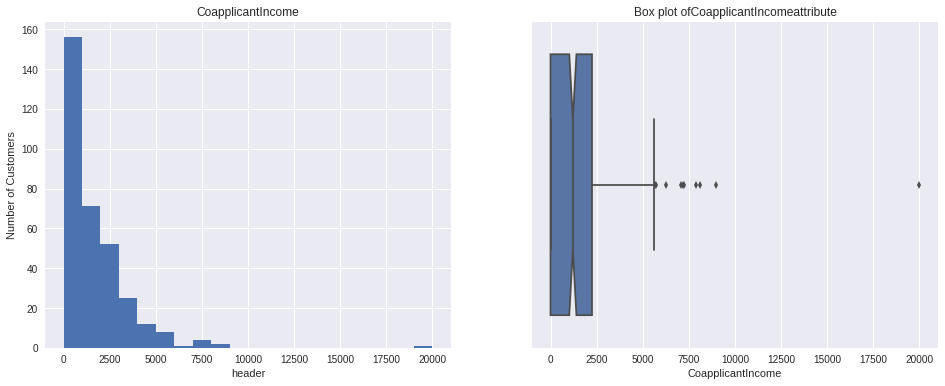

LoanAmount


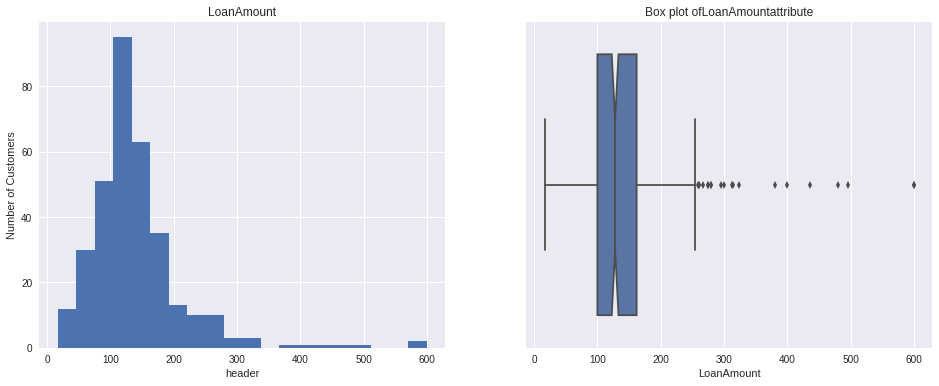

Loan_Amount_Term


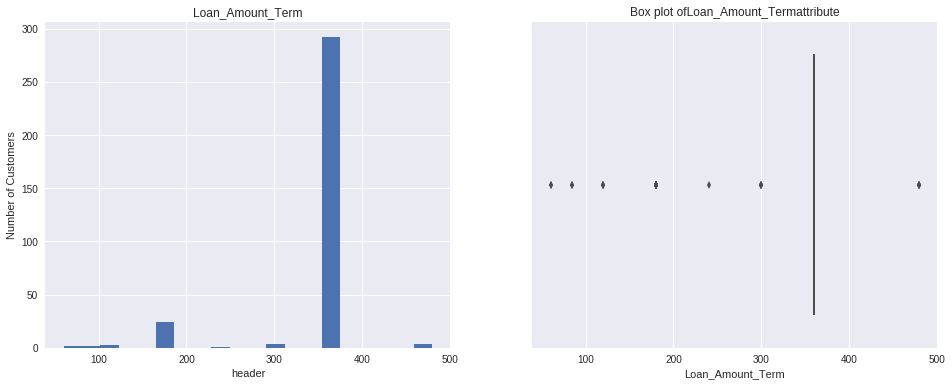

In [13]:
normalizer = preprocessing.Normalizer()
normalized_data = normalizer.fit_transform(df.drop('Credit_History', axis=1))

standard_scaler = preprocessing.StandardScaler()
df_data = standard_scaler.fit_transform(normalized_data)

scaled_X = pd.DataFrame(df_data, columns=((df.drop('Credit_History', axis=1))).columns)

y_labels = np.array(df['Credit_History'].values, dtype=float)
print(scaled_X)
plt_data(scaled_X)

### Scatterplot function for visualization of clusters

In [0]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'brown', 'red', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

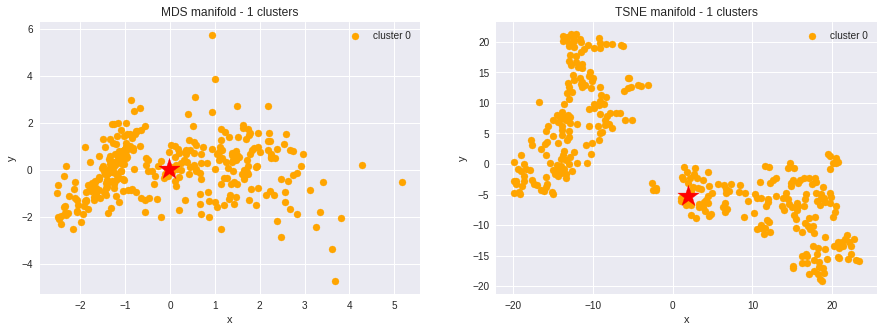

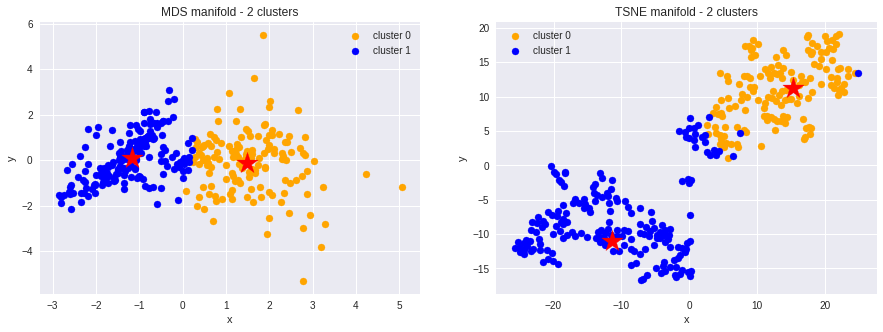

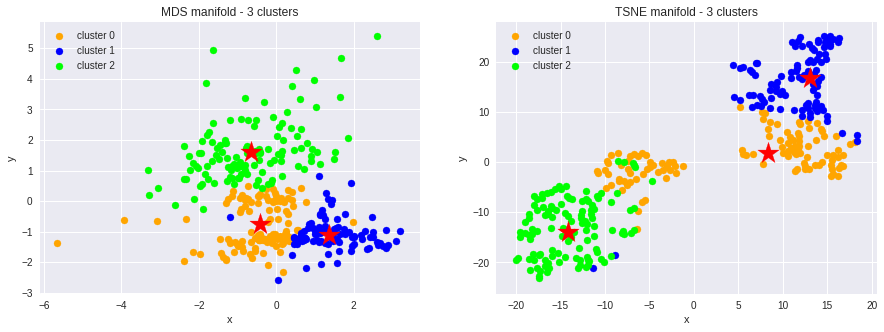

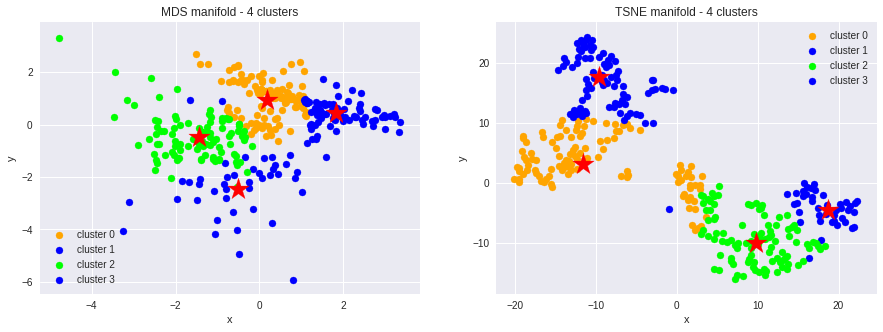

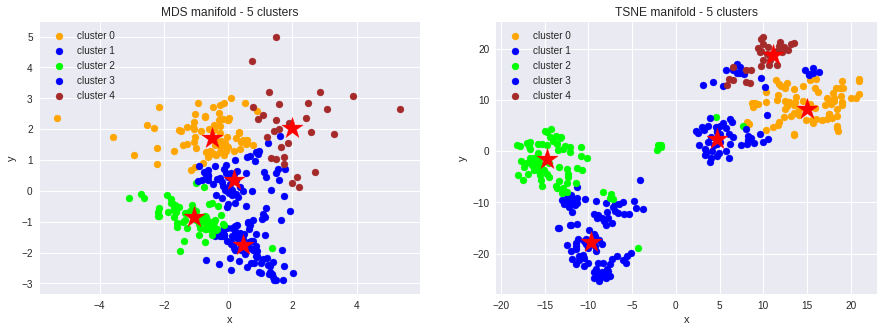

In [18]:
for k in range(1,6):
    # Run KMeans algorithm
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10,  init='k-means++', max_iter=1000, random_state=10, copy_x=True).fit(df_data)
    
    # Create new array composed of data + k centers 
    df_data_and_centers = np.r_[df_data,clustered_data_sklearn.cluster_centers_]

    f, axs = plt.subplots(1, 2, figsize=(15, 5))

    # MDS
    plt.subplot(1, 2, 1)
    XYcoordinates = manifold.MDS(n_components=2).fit_transform(df_data_and_centers)
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_, 
                           centers=XYcoordinates[-k:,:], 
                           title='MDS manifold - ' + str(k) + ' clusters')

    # TSE
    plt.subplot(1, 2, 2)
    XYcoordinates = manifold.TSNE(n_components=2).fit_transform(df_data_and_centers)
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_,
                           centers=XYcoordinates[-k:,:], 
                           title='TSNE manifold - ' + str(k) + ' clusters')

    plt.show()
    if k == 5:
        selected_clustered_data_sklearn = clustered_data_sklearn
 

In [19]:
df['cluster'] = pd.Series(selected_clustered_data_sklearn.labels_, index=df.index)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
0,2483,2466.0,90,180,0,4
1,4917,0.0,130,360,0,2
2,4106,0.0,40,180,1,1
3,3859,3300.0,142,180,1,3
4,6417,0.0,157,180,1,1


In [20]:
df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,2559.000000,2066.013333,123.613333,362.400000,1.000000
1,9679.044444,349.211111,165.111111,315.866667,0.988889
2,3797.226667,95.068267,103.453333,359.200000,0.973333
3,4629.967742,2377.545161,170.580645,342.580645,0.967742
4,3062.466667,5186.366667,143.566667,322.000000,0.933333


## Conclusions

Cluster 0 - Customers with low applicant income & their loan term is high

Cluster 1 - Customers applicant income is high & low coapplicant income

Cluster 2 - Customers applicant income is average & coapplicant income is very low.

Cluster 3 - Customers applicant & coapplicant incomes are average income & their loan amount is very high.

Cluster 4 - Coapplicant income is very high & applicant income is average.


# Task 2 (CS5062)
Plot the sum of squared distances from the data points (in loans_dataset_et3.csv) to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. If these methods suggest a different value of k (from the one you used in Task 1), then compute a new k-Means clustering.

Use another clustering algorithm (from the ones available in scikit-learn) for the same dataset and an appropriate manifold-learning technique to visualise it.

Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words) and by visualising the clustering’s with an appropriate manifold-learning technique.

In [26]:
max_num_clusters = 6
min_num_clusters = 1

# Create an empty array to store the SSE's (distances from the cluster centre)
SSE = np.empty(max_num_clusters - min_num_clusters)
# Generate an array consisting of the number of clusters
num_clusters = np.array(range(min_num_clusters, max_num_clusters), dtype="i4")
print("Number of clusters:", len(num_clusters))


for i in range(len(num_clusters)):   
    k = num_clusters[i]
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, max_iter=500).fit(df_data)
    SSE[i] = kmeans.inertia_
    print("SSE for {} cluster = {}".format(k, kmeans.inertia_))  

Number of clusters: 5
SSE for 1 cluster = 1328.0
SSE for 2 cluster = 759.8572904917257
SSE for 3 cluster = 603.2576249266954
SSE for 4 cluster = 483.7706739613702
SSE for 5 cluster = 421.5906544325173


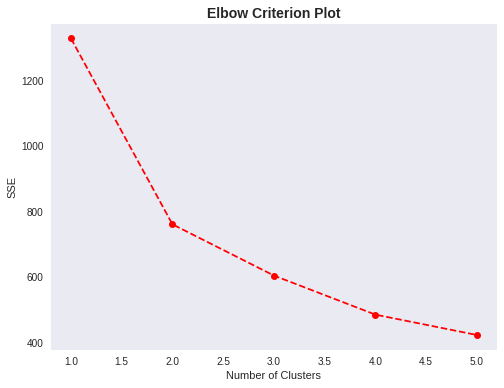

In [32]:
plt.figure(figsize=(8,6))

plt.title("Elbow Criterion Plot", fontsize=14, fontweight='bold')
plt.plot(num_clusters, SSE, 'ro--')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.grid()
plt.show()

### Observation on Elbow plot:

Whenever Sum of Square Errors(SSE) reduce while comparing to number of cluster increases in ELBOW plot but we don't see improve in clustering if cluster number improves.

We can select K=2 after that we don't see any drastic change.

## Attempt another method for determining the best value of k and an appropriate manifold-learning technique to visualise it. Discuss the differences between the k-Means clustering and the clustering found by the second algorithm